In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# LOAD DATA SET
df = pd.read_csv('student-data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [3]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,yes,no,3,2,3,3,3,5,5,no


In [4]:
df.shape

(395, 31)

In [5]:
df['passed'].value_counts(normalize =True)

yes    0.670886
no     0.329114
Name: passed, dtype: float64

Passed is the target variable.It is slightly imbalanced because majority of the class passed.Only few failed(~32.9%).

In [6]:
#cHECK FOR NULL VALUES
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

## Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
passed         2
dtype: int64

In [9]:
# Encode target variable
enc = {'yes':1, 'no':0}
df['passed'] = df['passed'].map(enc)

In [12]:
X =df.drop('passed',axis =1)
y = df['passed']

In [13]:
X.select_dtypes(include = object).columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Xle = X.copy()
cat = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']
for f in cat:
    Xle[f] = le.fit_transform(Xle[[f]])

C:\Users\zacha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [15]:
Xle.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,2.169620,2.281013,...,0.949367,0.832911,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,...,0.219525,0.373528,0.472300,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [16]:
#MinMax scaler
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
for f in Xle.columns:
    Xle[f] = ms.fit_transform(Xle[[f]])

In [17]:
Xle.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.00000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,0.242315,0.777215,0.288608,0.896203,0.687342,0.63038,0.542405,0.570253,...,0.949367,0.832911,0.334177,0.736076,0.558861,0.527215,0.120253,0.322785,0.638608,0.076118
std,0.321177,0.499926,0.182292,0.416643,0.453690,0.305384,0.273684,0.27205,0.306868,0.215885,...,0.219525,0.373528,0.472300,0.224165,0.249716,0.278320,0.222685,0.321974,0.347576,0.106708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.142857,1.000000,0.000000,1.000000,0.500000,0.50000,0.500000,0.500000,...,1.000000,1.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,0.500000,0.000000
50%,0.000000,0.000000,0.285714,1.000000,0.000000,1.000000,0.750000,0.50000,0.500000,0.500000,...,1.000000,1.000000,0.000000,0.750000,0.500000,0.500000,0.000000,0.250000,0.750000,0.053333
75%,0.000000,1.000000,0.428571,1.000000,1.000000,1.000000,1.000000,0.75000,0.750000,0.750000,...,1.000000,1.000000,1.000000,1.000000,0.750000,0.750000,0.250000,0.500000,1.000000,0.106667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#one hot encode
X1d = pd.get_dummies(X, drop_first = True)
X1 = pd.get_dummies(X)

In [19]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix


In [20]:
# perform Logistic regression with all features using one hot encoded features X1d

X_train,X_test,y_train,y_test = train_test_split(X1d, y, random_state = 42, test_size = .2,stratify = y)
lr = LogisticRegression()
lr.fit(X_train,y_train)
ypred = lr.predict(X_test)
print("accuracy_score ", accuracy_score(ypred,y_test) )
print("precision_score ", precision_score(ypred,y_test) )
print("recall_score ",recall_score(ypred,y_test) )
confusion_matrix(ypred,y_test)

accuracy_score  0.6582278481012658
precision_score  0.8113207547169812
recall_score  0.7166666666666667


C:\Users\zacha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 9, 10],
       [17, 43]], dtype=int64)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(Xle, y, random_state = 42, test_size = .2)
lr = LogisticRegression()
lr.fit(X_train,y_train)
ypred = lr.predict(X_test)
print("accuracy_score ", accuracy_score(ypred,y_test) )
print("precision_score ", precision_score(ypred,y_test) )
print("recall_score ",recall_score(ypred,y_test) )
confusion_matrix(ypred,y_test)

accuracy_score  0.7088607594936709
precision_score  0.9230769230769231
recall_score  0.7164179104477612


array([[ 8,  4],
       [19, 48]], dtype=int64)

Label Encoded data is performing better compared to One hot with all features on Logistic Rgression Model.Next will try to make simple model using selected features.

### Feature Selection

In [22]:
#feaure importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = train_test_split(Xle, y, random_state = 42, test_size = .2) 
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
ypred = rf.predict(X_test)
print("accuracy_score ", accuracy_score(ypred,y_test) )
print("precision_score ", precision_score(ypred,y_test) )
print("recall_score ",recall_score(ypred,y_test) )
print(confusion_matrix(ypred,y_test))
imp = pd.Series(rf.feature_importances_,index = X_train.columns).sort_values()


accuracy_score  0.7088607594936709
precision_score  0.9423076923076923
recall_score  0.7101449275362319
[[ 7  3]
 [20 49]]


In [23]:
imp

Pstatus       0.010218
school        0.012158
famsize       0.014815
nursery       0.015550
higher        0.016412
activities    0.016958
address       0.017134
internet      0.018659
romantic      0.020319
sex           0.021693
paid          0.022007
schoolsup     0.023484
Dalc          0.024157
guardian      0.024489
famsup        0.025800
traveltime    0.026331
famrel        0.033259
Fjob          0.034635
reason        0.037767
Walc          0.038480
studytime     0.038944
Medu          0.041164
Fedu          0.041949
health        0.045121
Mjob          0.045421
freetime      0.047545
goout         0.057286
age           0.060895
failures      0.079514
absences      0.087836
dtype: float64

In [24]:
imp.index

Index(['Pstatus', 'school', 'famsize', 'nursery', 'higher', 'activities',
       'address', 'internet', 'romantic', 'sex', 'paid', 'schoolsup', 'Dalc',
       'guardian', 'famsup', 'traveltime', 'famrel', 'Fjob', 'reason', 'Walc',
       'studytime', 'Medu', 'Fedu', 'health', 'Mjob', 'freetime', 'goout',
       'age', 'failures', 'absences'],
      dtype='object')

In [25]:
#based on feature importance select features and do modelling using lr

select = ['reason', 'Walc',
       'studytime', 'Medu', 'Fedu', 'health', 'Mjob', 'freetime', 'goout',
       'age', 'failures', 'absences']

In [26]:
Xle[select].dtypes

reason       float64
Walc         float64
studytime    float64
Medu         float64
Fedu         float64
health       float64
Mjob         float64
freetime     float64
goout        float64
age          float64
failures     float64
absences     float64
dtype: object

<AxesSubplot:>

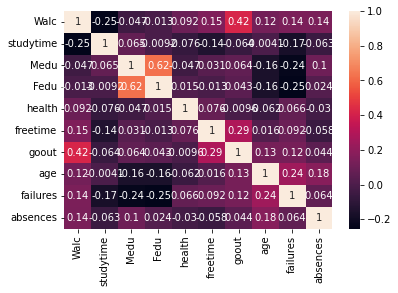

In [27]:
#check corelation to ensure no colinearity
sns.heatmap(df[select].corr(),annot =True)

In [28]:
# drop 1 of the 2 colinear columns : 
select.remove('Fedu')
select.remove('Walc')

In [29]:
Xs = Xle[select]
X_train,X_test,y_train,y_test = train_test_split(Xs, y, random_state = 42, test_size = .2)
lr1 = LogisticRegression()
lr1.fit(X_train,y_train)
ypred = lr1.predict(X_test)
print("accuracy_score ", accuracy_score(ypred,y_test) )
print("precision_score ", precision_score(ypred,y_test) )
print("recall_score ",recall_score(ypred,y_test) )
confusion_matrix(ypred,y_test)

accuracy_score  0.7341772151898734
precision_score  0.9423076923076923
recall_score  0.7313432835820896


array([[ 9,  3],
       [18, 49]], dtype=int64)

In [32]:
#adjust threshhold to improve recall of the model
thresh = .65
pred_proba=lr1.predict_proba(X_test)[:,1]
ypredp = (pred_proba>thresh).astype(int)


In [33]:
print("accuracy_score ", accuracy_score(ypredp,y_test) )
print("precision_score ", precision_score(ypredp,y_test) )
print("recall_score ",recall_score(ypredp,y_test) )
confusion_matrix(ypredp,y_test)

accuracy_score  0.7468354430379747
precision_score  0.8653846153846154
recall_score  0.7758620689655172


array([[14,  7],
       [13, 45]], dtype=int64)

This model predicts if a student will pass only if predicted probability > threshhold.By increasing threshhold, we will miss only few students who really need intervention. 


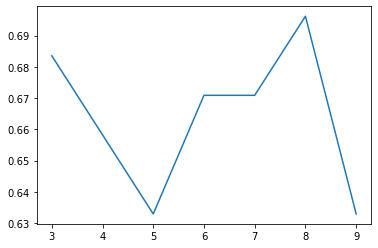

In [34]:
#based on feature importance select features and do modelling using knn
X_train,X_test,y_train,y_test = train_test_split(Xs, y, random_state = 42, test_size = .2) #Xs: selected features
from sklearn.neighbors import KNeighborsClassifier
acc_values =[]
neighbors = np.arange(3,10)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors =k, metric ='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc_values.append(accuracy_score(y_pred,y_test))
plt.plot(neighbors,acc_values)

In [35]:
#select 8 for n_neighbors
classifier = KNeighborsClassifier(n_neighbors =8, metric ='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("accuracy_score ", accuracy_score(y_pred,y_test) )
print("precision_score ", precision_score(y_pred,y_test) )
print("recall_score ",recall_score(y_pred,y_test) )
confusion_matrix(y_pred,y_test)

accuracy_score  0.6962025316455697
precision_score  0.8461538461538461
recall_score  0.7333333333333333


array([[11,  8],
       [16, 44]], dtype=int64)

In [36]:

#Feature selection using Information Gain
from sklearn.feature_selection import mutual_info_classif
importance =  mutual_info_classif(Xle,y)
feat_imp = pd.Series(importance,Xle.columns).sort_values()
feat_imp.index

Index(['school', 'Dalc', 'freetime', 'romantic', 'famsize', 'Pstatus', 'Medu',
       'nursery', 'Mjob', 'traveltime', 'studytime', 'absences', 'age',
       'famrel', 'Fedu', 'health', 'internet', 'Walc', 'higher', 'paid',
       'famsup', 'goout', 'address', 'Fjob', 'activities', 'schoolsup', 'sex',
       'guardian', 'reason', 'failures'],
      dtype='object')

In [39]:
sel =  ['famsup', 'goout', 'address', 'Fjob', 'activities', 'schoolsup', 'sex',
       'guardian', 'reason', 'failures'] 
Xs1= Xle[sel]

X_train,X_test,y_train,y_test = train_test_split(Xs1, y, random_state = 42, test_size = .2)
lr1 = LogisticRegression()
lr1.fit(X_train,y_train)
ypred = lr1.predict(X_test)
print("accuracy_score ", accuracy_score(ypred,y_test) )
print("precision_score ", precision_score(ypred,y_test) )
print("recall_score ",recall_score(ypred,y_test) )
confusion_matrix(ypred,y_test)

accuracy_score  0.7215189873417721
precision_score  0.9615384615384616
recall_score  0.7142857142857143


array([[ 7,  2],
       [20, 50]], dtype=int64)

## Conclusion

Logistic regression is giving better result with feature reduction.Selected features using RandomForest.feature_importances_ are
* 'reason', 'Walc','studytime', 'Medu', 'Fedu', 'health', 'Mjob', 'freetime', 'goout', 'age', 'failures', 'absences'.

The corresponding scores were 
* accuracy_score  0.7341772151898734
* precision_score  0.9423076923076923
* recall_score  0.7313432835820896
Recall can be increased (.77) by increasing the threshhold(.65) .



Another approach was using mutual_info_classif for feature selection and the selected features are the following. In this case also logistic regression was used.
* 'famsup', 'goout', 'address', 'Fjob', 'activities', 'schoolsup', 'sex','guardian', 'reason', 'failures'

This also got good scores as follows.
* accuracy_score  0.7215189873417721
* precision_score  0.9615384615384616
* recall_score  0.7142857142857143

Further improvement can be done to improve recall.



In [65]:
features = set(['reason', 'Walc','studytime', 'Medu', 'Fedu', 'health', 'Mjob', 'freetime', 'goout', 'age', 'failures', 'absences','famsup', 'goout', 'address', 'Fjob', 'activities', 'schoolsup', 'sex','guardian', 'reason', 'failures','passed'])


<AxesSubplot:>

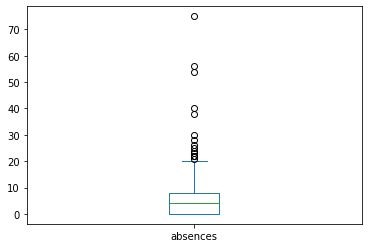

In [53]:
df['absences'].plot(kind = 'box')

In [66]:
# outlier can be capped to Q3 + 1.5IQR
q3 =df['absences'].quantile(.75) 
q1 = df['absences'].quantile(.25) 
iqr = q3-q1
up = q3 + 1.5*iqr
df['absences'].std()
df[df['absences']>20][features]

,health,Fjob,Medu,activities,studytime,address,sex,passed,age,schoolsup,freetime,failures,Mjob,Walc,absences,reason,Fedu,famsup,goout,guardian
40,3,other,2,yes,2,U,F,1,16,no,3,1,other,2,25,home,2,yes,3,mother
74,5,services,3,yes,2,U,F,1,16,yes,3,0,other,4,54,home,3,yes,3,mother
103,2,other,3,no,2,U,F,0,15,yes,3,0,services,1,26,home,2,yes,5,mother
183,1,other,3,yes,2,U,F,0,17,no,3,0,other,3,56,reputation,3,yes,3,mother
198,2,teacher,4,no,1,U,F,1,17,no,2,1,services,3,24,home,4,yes,4,mother
205,5,services,3,no,3,U,F,0,17,no,4,1,at_home,4,28,home,4,yes,3,mother
216,1,other,4,no,2,U,F,0,17,no,4,2,other,4,22,reputation,3,no,5,mother
260,2,other,4,no,2,U,F,1,18,no,1,0,services,3,21,home,3,yes,2,father
276,5,services,3,no,2,R,F,0,18,no,1,0,other,1,75,home,2,no,1,mother
277,3,services,4,yes,1,U,M,0,18,no,2,0,teacher,4,22,home,4,no,4,mother


### From outliers more insight can be concluded on the feature importance. With many absence some are still passed.Will Try to find the factors influencing them.Scope for furhter study.

<AxesSubplot:>

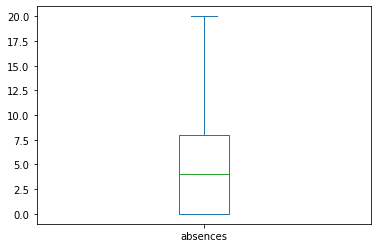

In [79]:
#Also check if outlier capping is improving the model.
X.loc[X['absences']>20,'absences'] = 20
X['absences'].plot(kind = 'box')

In [81]:
# preprocessing Xle
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Xle = X.copy()
cat = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']
for f in cat:
    Xle[f] = le.fit_transform(Xle[[f]])
#MinMax scaler
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
for f in Xle.columns:
    Xle[f] = ms.fit_transform(Xle[[f]])    

C:\Users\zacha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [83]:
# From RF.feature_importances_
select = ['reason', 'studytime', 'Medu',  'health', 'Mjob', 'freetime', 'goout',
       'age', 'failures', 'absences']
Xs = Xle[select]
X_train,X_test,y_train,y_test = train_test_split(Xs, y, random_state = 42, test_size = .2)
lr1 = LogisticRegression()
lr1.fit(X_train,y_train)
ypred = lr1.predict(X_test)
print("accuracy_score ", accuracy_score(ypred,y_test) )
print("precision_score ", precision_score(ypred,y_test) )
print("recall_score ",recall_score(ypred,y_test) )
confusion_matrix(ypred,y_test)

accuracy_score  0.7215189873417721
precision_score  0.9423076923076923
recall_score  0.7205882352941176


array([[ 8,  3],
       [19, 49]], dtype=int64)

In [82]:
#Feature selection using Information Gain
sel =  ['famsup', 'goout', 'address', 'Fjob', 'activities', 'schoolsup', 'sex',
       'guardian', 'reason', 'failures'] 
Xs1= Xle[sel]

X_train,X_test,y_train,y_test = train_test_split(Xs1, y, random_state = 42, test_size = .2)
lr1 = LogisticRegression()
lr1.fit(X_train,y_train)
ypred = lr1.predict(X_test)
print("accuracy_score ", accuracy_score(ypred,y_test) )
print("precision_score ", precision_score(ypred,y_test) )
print("recall_score ",recall_score(ypred,y_test) )
confusion_matrix(ypred,y_test)

accuracy_score  0.7215189873417721
precision_score  0.9615384615384616
recall_score  0.7142857142857143


array([[ 7,  2],
       [20, 50]], dtype=int64)

Not much improvement after outlier handling.